In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel(r'C:\Users\GGU\Downloads\Gold_Price_India_By_State.xlsx')

# Display basic info
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    350 non-null    object 
 1   Year                     350 non-null    int64  
 2   Gold_Price_INR_per_gram  350 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.3+ KB
None


,State,Year,Gold_Price_INR_per_gram
0,Andhra Pradesh,1990,506.37
1,Andhra Pradesh,1991,435.38
2,Andhra Pradesh,1992,524.83
3,Andhra Pradesh,1993,474.15
4,Andhra Pradesh,1994,538.02


In [9]:
# Summary of gold prices
print("Gold Price Summary (INR per gram):")
print(df['Gold_Price_INR_per_gram'].describe())

# Number of entries per state
print("\nNumber of entries per state:")
print(df['State'].value_counts())


Gold Price Summary (INR per gram):
count     350.000000
mean     1190.196914
std       454.942971
min       294.960000
25%       817.102500
50%      1169.830000
75%      1542.050000
max      2326.510000
Name: Gold_Price_INR_per_gram, dtype: float64

Number of entries per state:
State
Andhra Pradesh    35
Telangana         35
Tamil Nadu        35
Kerala            35
Karnataka         35
Maharashtra       35
Gujarat           35
West Bengal       35
Delhi             35
Rajasthan         35
Name: count, dtype: int64


In [10]:
before_2000 = df[df['Year'] < 2000]
after_2000 = df[df['Year'] >= 2000]

print("Average Gold Price Before 2000:", round(before_2000['Gold_Price_INR_per_gram'].mean(), 2))
print("Average Gold Price After 2000:", round(after_2000['Gold_Price_INR_per_gram'].mean(), 2))


Average Gold Price Before 2000: 665.82
Average Gold Price After 2000: 1399.95


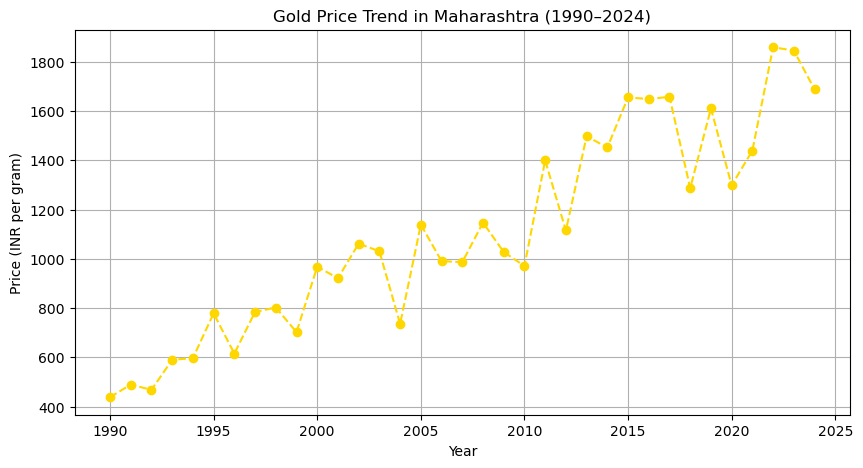

In [11]:
state_data = df[df['State'] == 'Maharashtra']

plt.figure(figsize=(10, 5))
plt.plot(state_data['Year'], state_data['Gold_Price_INR_per_gram'], marker='o', linestyle='--', color='gold')
plt.title("Gold Price Trend in Maharashtra (1990–2024)")
plt.xlabel("Year")
plt.ylabel("Price (INR per gram)")
plt.grid(True)
plt.show()


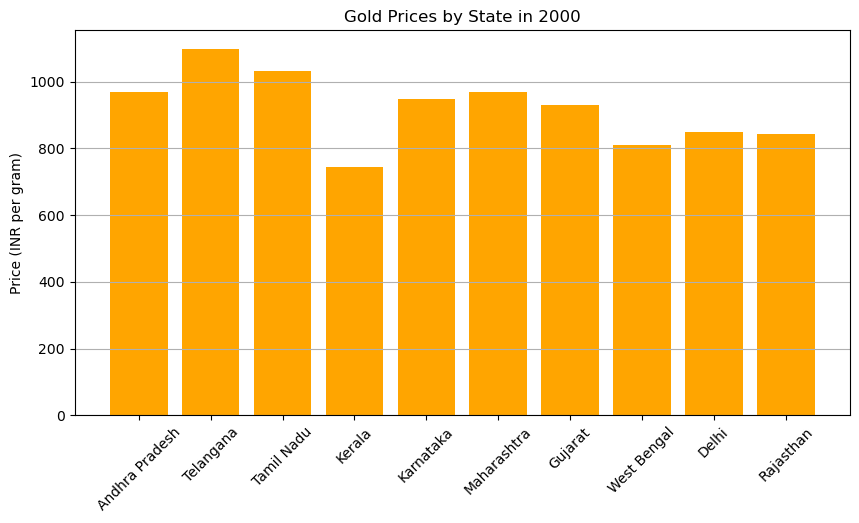

In [12]:
year_selected = 2000
year_data = df[df['Year'] == year_selected]

plt.figure(figsize=(10, 5))
plt.bar(year_data['State'], year_data['Gold_Price_INR_per_gram'], color='orange')
plt.title(f"Gold Prices by State in {year_selected}")
plt.xticks(rotation=45)
plt.ylabel("Price (INR per gram)")
plt.grid(True, axis='y')
plt.show()


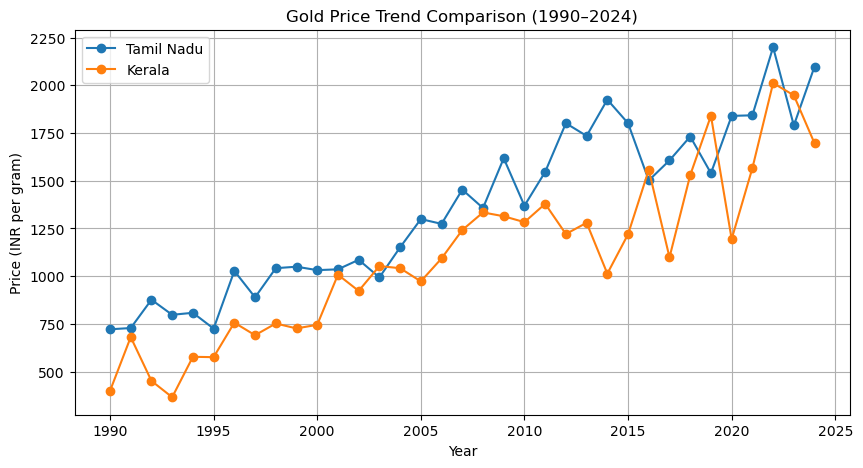

In [13]:
states_to_compare = ['Tamil Nadu', 'Kerala']
plt.figure(figsize=(10, 5))

for state in states_to_compare:
    temp = df[df['State'] == state]
    plt.plot(temp['Year'], temp['Gold_Price_INR_per_gram'], marker='o', label=state)

plt.title("Gold Price Trend Comparison (1990–2024)")
plt.xlabel("Year")
plt.ylabel("Price (INR per gram)")
plt.legend()
plt.grid(True)
plt.show()


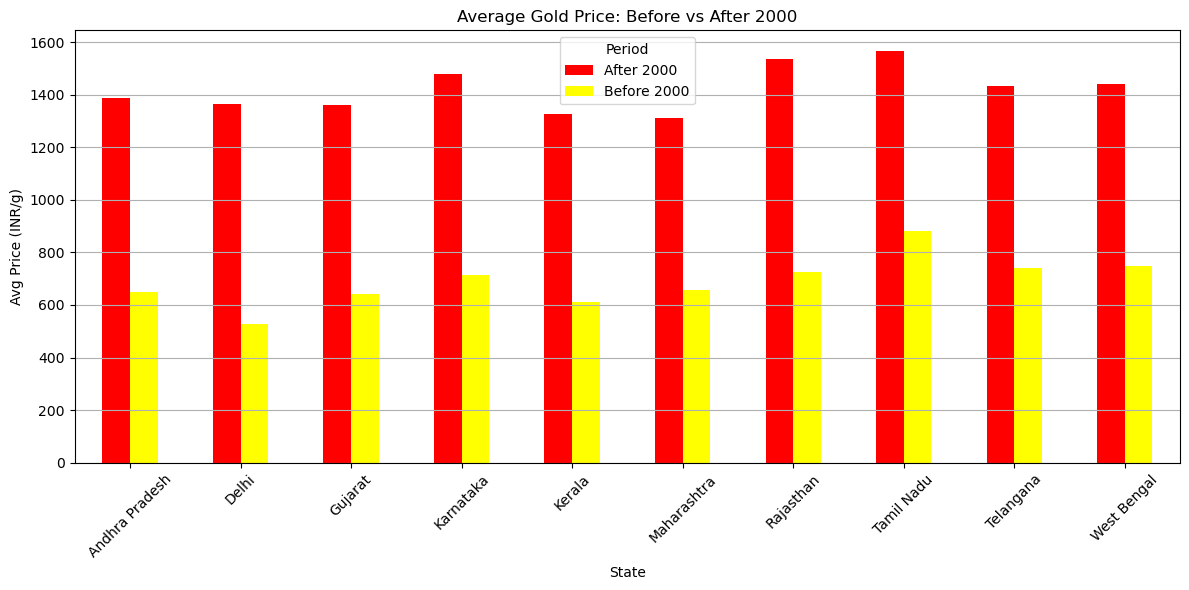

In [14]:
df['Period'] = np.where(df['Year'] <= 2000, 'Before 2000', 'After 2000')

avg_price = df.groupby(['State', 'Period'])['Gold_Price_INR_per_gram'].mean().unstack()

avg_price.plot(kind='bar', figsize=(12, 6), colormap='autumn')
plt.title('Average Gold Price: Before vs After 2000')
plt.ylabel('Avg Price (INR/g)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


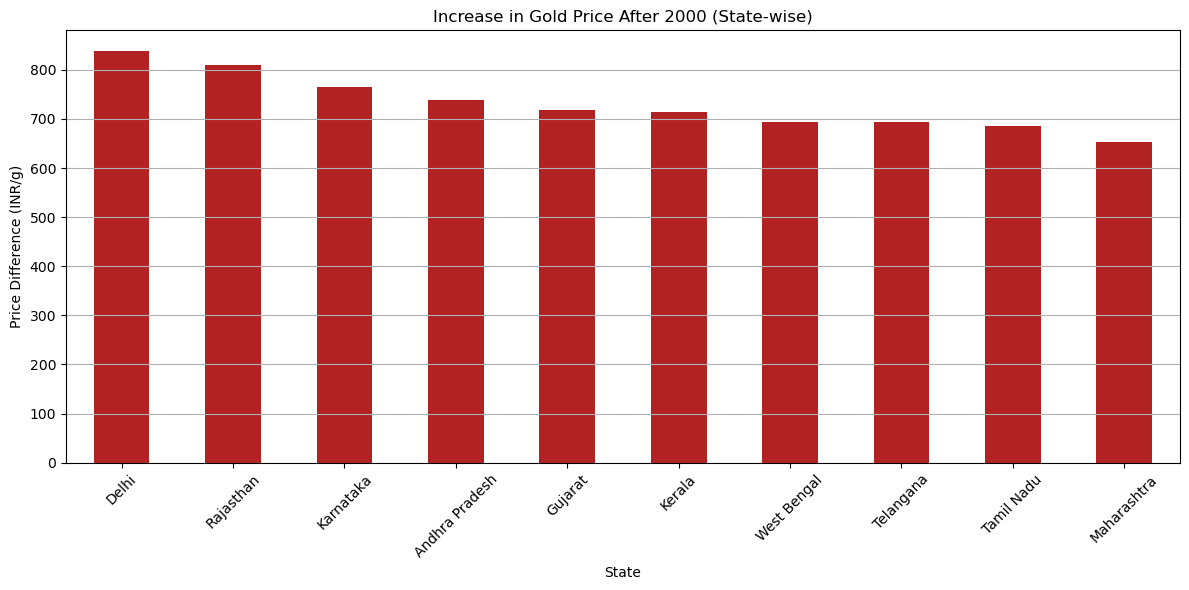

In [15]:
avg_price['Change'] = avg_price['After 2000'] - avg_price['Before 2000']
avg_price['Change'].sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), color='firebrick')

plt.title('Increase in Gold Price After 2000 (State-wise)')
plt.ylabel('Price Difference (INR/g)')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
